In [1]:
import pandas as pd

# "Stunting Disparities by Residence and Wealth Quintile" at http://data.unicef.org/nutrition/malnutrition.html
# Unicef May 2016 stunting disparity: Stunting prevalence in children under 5 (%) by area of residence 
# and wealth quintile, 2009–2015

# Severe Wasting: Percentage of children aged 0–59 months who are below minus three standard deviations from median weight-for-height of the WHO Child Growth Standards.
# Wasting – Moderate and severe: Percentage of children aged 0–59 months who are below minus two standard deviations from median weight-for-height of the WHO Child Growth Standards.
# Overweight – Moderate and severe: Percentage of children aged 0-59 months who are above two standard deviations from median weight-for-height of the WHO Child Growth Standards. 
# Stunting – Moderate and severe: Percentage of children aged 0–59 months who are below minus two standard deviations from median height-for-age of the WHO Child Growth Standards.
# Underweight – Moderate and severe: Percentage of children aged 0–59 months who are below minus two standard deviations from median weight-for-age of the World Health Organization (WHO) Child Growth Standards.

# Rename columns with more readable names
m_names=['ISO_country', 'country_name', 'Year','WB_income_region','sample_size', 'severe_wasting', 'wasting', 'overweight', 'stunting', 'underweight', 
      'notes', 'author', 'source', 'under_5_pop']

# Select columns to read
m_parse = "A,B,D,J,M:V"

# Load Excel file as dataframe
malnutrition_data_raw = pd.read_excel('./jme_master_2015_127fcff.xlsx', parse_cols=m_parse, names=m_names, skiprows=14, 
                                     index_col=None)


In [2]:
#Check formatting
malnutrition_data_raw[0:5]

,ISO_country,country_name,Year,WB_income_region,sample_size,severe_wasting,wasting,overweight,stunting,underweight,notes,author,source,under_5_pop
0,AFG,AFGHANISTAN,1997,Low income,4846.0,NaN,18.2,6.5,53.2,44.9,Converted estimates,NaN,Afghanistan 1997 multiple indicator baseline (...,3567.351
1,AFG,AFGHANISTAN,2004,Low income,946.0,3.5,8.6,4.6,59.3,32.9,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,4551.391
2,AFG,AFGHANISTAN,2013,Low income,21922.0,4.0,9.5,5.4,40.9,25.0,(pending reanalysis),"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,4993.944
3,ALB,ALBANIA,1997,Upper middle income,7642.0,NaN,8.1,9.5,20.4,7.1,Converted estimates,NaN,National study on nutrition in Albania. Instit...,307.871
4,ALB,ALBANIA,2000,Upper middle income,1385.0,6.2,12.2,30.0,39.2,17.0,NaN,National Institute of Statistics (Albania) and...,Multiple indicator cluster survey report Alban...,278.754


In [5]:
# Identify data time range
print set(malnutrition_data_raw['Year'])

set([1983, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])


In [6]:
# Check maximum stunting value for first visualizaiton 
max(malnutrition_data_raw['stunting'])

73.599999999999994

In [8]:
import numpy as np

regions = malnutrition_data_raw.groupby(['WB_income_region', 'Year'])

mean_regional_stunting = regions.aggregate(np.mean)
                                      
mean_regional_stunting.describe()


# malnutrition_data_raw['WB_income_region']

,sample_size,severe_wasting,wasting,overweight,stunting,underweight,under_5_pop
count,1.380000e+02,112.000000,139.000000,135.000000,139.000000,139.000000,139.000000
mean,1.525493e+05,2.040552,6.142064,6.772679,25.159889,13.258836,4989.807377
std,3.041227e+05,1.434908,4.149972,2.852860,15.678143,10.593478,6384.563809
min,6.000000e+02,0.000000,0.150000,0.900000,1.800000,0.400000,8.402000
25%,NaN,NaN,3.266667,NaN,12.260256,3.749432,1320.085250
50%,NaN,NaN,5.475000,NaN,23.600000,10.150000,2508.943667
75%,NaN,NaN,8.940110,NaN,39.258333,21.869005,6073.459714
max,1.181816e+06,6.250000,25.300000,15.900000,54.800000,45.000000,42476.550000


In [7]:
# Would the d3 visualization require less logic if JSON was used? 
malnutrition_data_raw.to_json('../clean_analysis/UNICEF_child_malnutrition_Sept_2015.json')

In [8]:
# Browse data aggregated by year.  Early years in the dataset are sparse. 
malnutrition_data_raw.groupby(['ISO_country', 'Year']).head()

,ISO_country,country_name,Year,WB_income_region,sample_size,severe_wasting,wasting,overweight,stunting,underweight,notes,author,source,under_5_pop
0,AFG,AFGHANISTAN,1997,Low income,4846.0,NaN,18.2,6.5,53.2,44.9,Converted estimates,NaN,Afghanistan 1997 multiple indicator baseline (...,3567.351
1,AFG,AFGHANISTAN,2004,Low income,946.0,3.5,8.6,4.6,59.3,32.9,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,4551.391
2,AFG,AFGHANISTAN,2013,Low income,21922.0,4.0,9.5,5.4,40.9,25.0,(pending reanalysis),"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,4993.944
3,ALB,ALBANIA,1997,Upper middle income,7642.0,NaN,8.1,9.5,20.4,7.1,Converted estimates,NaN,National study on nutrition in Albania. Instit...,307.871
4,ALB,ALBANIA,2000,Upper middle income,1385.0,6.2,12.2,30.0,39.2,17.0,NaN,National Institute of Statistics (Albania) and...,Multiple indicator cluster survey report Alban...,278.754
5,ALB,ALBANIA,2005,Upper middle income,1090.0,3.7,7.3,25.2,27.0,6.6,NaN,Albanian National Institute of Statistics.,Albania multiple indicator cluster survey 2005...,213.005
6,ALB,ALBANIA,2009,Upper middle income,1490.0,5.9,9.4,23.4,23.1,6.3,NaN,"Institute of Statistics, Institute of Public H...",Albania demographic and health survey 2008-09....,163.573
7,DZA,ALGERIA,1987,Upper middle income,2344.0,NaN,4.0,NaN,16.9,8.0,Converted estimates,Kellou K.,Etat nutritionnel des enfants algériens de 0 à...,3979.161
8,DZA,ALGERIA,1992,Upper middle income,4629.0,3.0,7.1,8.7,22.9,9.2,NaN,République Algérienne démocratique et populaire.,Enquête Algérienne sur la santé de la mère et ...,3942.738
9,DZA,ALGERIA,1995,Upper middle income,3825.0,4.2,9.6,13.2,22.5,11.3,NaN,Ministère de la Santé et de la Population.,Enquête nationale sur les objectifs de la mi-d...,3734.288


In [3]:
import numpy as np

Years = malnutrition_data_raw.groupby('Year')

mean_stunting = Years.aggregate(np.mean)
                                      
mean_stunting.describe()

## 32 years from 1983 to 2015 with varying yearly sample sizes and number of countries included. Regional estimates seem more accurate 
## for some regions than others. For example, while Asia and Africa are more often sampled, Northern Europe and North America were 
## sampled less often. 

/usr/local/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,sample_size,severe_wasting,wasting,overweight,stunting,underweight,under_5_pop
count,32.000000,31.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,77843.531048,2.203441,7.234529,6.402668,31.346004,16.746314,6079.463514
std,88029.046150,0.746801,2.060514,1.784948,5.612374,3.858398,3545.787751
min,3813.000000,0.600000,2.200000,2.872727,19.336111,9.300000,383.785000
25%,26197.100000,NaN,6.302083,5.285625,27.420437,14.095833,3596.865363
50%,59297.572727,NaN,7.029861,6.582843,31.425870,16.511759,5287.349777
75%,85368.842262,NaN,7.902778,7.183196,33.791295,19.232529,8029.687143
max,387118.628571,3.566667,15.100000,12.350000,46.000000,22.815385,14974.848250


In [10]:
mean_stunting.head()

,sample_size,severe_wasting,wasting,overweight,stunting,underweight,under_5_pop
Year,,,,,,,
1983,27510.000000,1.200000,5.500000,3.100000,46.000000,22.800000,575.168000
1985,4123.250000,NaN,15.100000,12.350000,33.075000,22.775000,383.785000
1986,22258.400000,0.833333,7.130000,5.616667,31.730000,20.866667,4322.160500
1987,32337.666667,1.442857,5.700000,2.872727,34.693750,20.194118,9936.623222
1988,15308.416667,0.857143,5.927273,4.244444,35.363636,15.500000,3354.931250


In [4]:
import rpy2.interactive as r
import rpy2.interactive.packages

%load_ext rpy2.ipython
%pylab inline 
%Rpush mean_stunting

# CONVERT PANDAS DATAFRAME TO R DATA.FRAME
%load_ext rmagic

col = mean_stunting.columns
 
%R -i mean_stunting,col colnames(mean_stunting) <- unlist(col)

%R mean_stunt_plot <- data.frame(mean_stunting); print(is.data.frame(mean_stunt_plot))
 
%R print(head(mean_stunt_plot))

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/extensions/rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


[1] TRUE


     sample_size severe_wasting   wasting overweight stunting underweight
1983    27510.00      1.2000000  5.500000   3.100000 46.00000    22.80000
1985     4123.25            NaN 15.100000  12.350000 33.07500    22.77500
1986    22258.40      0.8333333  7.130000   5.616667 31.73000    20.86667
1987    32337.67      1.4428571  5.700000   2.872727 34.69375    20.19412
1988    15308.42      0.8571429  5.927273   4.244444 35.36364    15.50000
1989    22203.33      1.4000000  7.911111   6.950000 30.33000    16.10000
     under_5_pop
1983     575.168
1985     383.785
1986    4322.160
1987    9936.623
1988    3354.931
1989   14974.848


[1] 31.49874
[1] 31.346


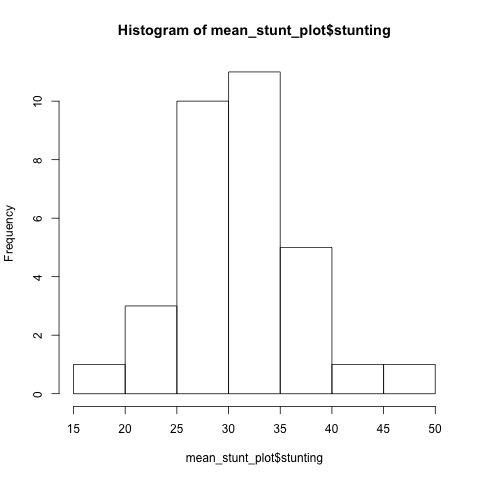

In [12]:
%%R 
hist(mean_stunt_plot$stunting)
print(var(mean_stunt_plot$stunting))
print(mean(mean_stunt_plot$stunting))

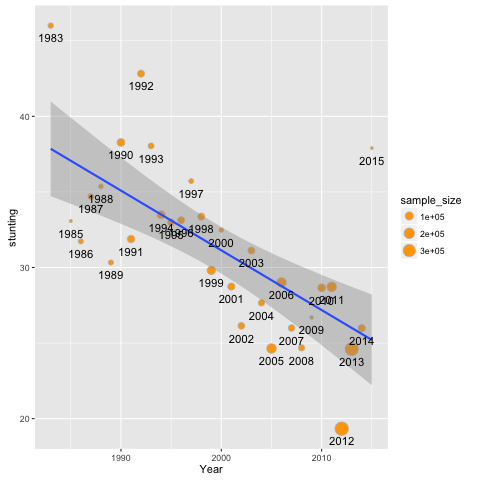

In [26]:
%%R 

options(jupyter.plot_mimetypes = 'image/svg+xml')

library(ggplot2)

mean_stunt_plot$Year <- as.numeric(rownames(mean_stunt_plot))

m_stunting <- ggplot(mean_stunt_plot, aes(x=Year, y=stunting)) 

m_stunting <- m_stunting + geom_point(aes(size=sample_size), shape=21, color="grey", fill="orange") + stat_smooth(method=lm) 
    
m_stunting + geom_text(aes(label=Year), size=4, vjust=2)

## This linear analysis shows a decrease over time, though the estimate's confidence interval is wide.  This is partially due to 

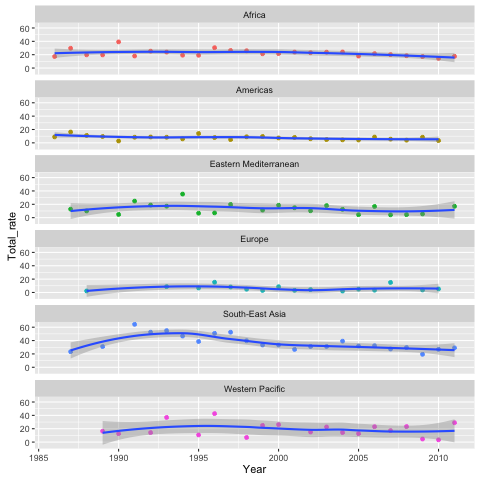

In [11]:
%%R

regionldat <- read.csv("../clean_analysis/regionalmalnutrition.csv")
regionldat <- na.omit(regionldat)

library(plyr)
regionaldat <- ddply(regionldat, .(WHO.region, Year), summarise, 
      Total_rate = mean(total_rate))

regionaldat$WHO.region <- as.factor(regionaldat$WHO.region)

library(ggplot2)
g <- ggplot(regionaldat, aes(x=Year, y=Total_rate)) 
g + facet_wrap(~ WHO.region, ncol=1, nrow=6) + geom_point(aes(color=WHO.region)) + geom_smooth() + theme(legend.position="none")
#     + scale_x_continuous(breaks=1983:2015) + scale_y_continuous(breaks=0:100)

# Is this the same data? Have to double check. 

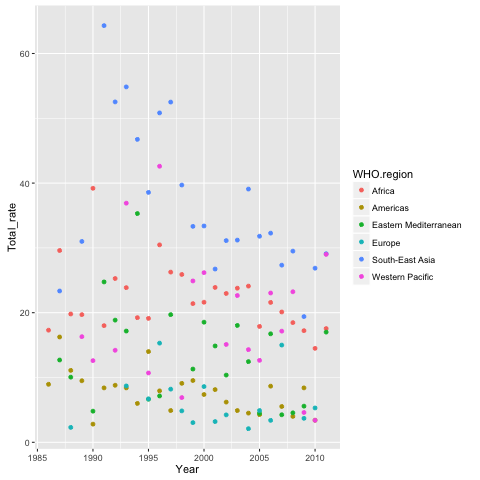

In [15]:
%%R 

gy <- ggplot(regionaldat, aes(x=Year, y=Total_rate, color=WHO.region)) + geom_point()

gy

In [35]:
regions = malnutrition_data_raw.groupby(['WB_income_region', 'Year'])

mean_regional_stunting = regions.aggregate(np.mean)

mean_regional_stunting.head()

#Write this as CSV to test Quicksight upload? 

sample_size  severe_wasting  wasting  overweight  \
WB_income_region  Year                                                     
High income: OECD 1986     196467.0             NaN     0.70       15.40   
                  1991      19503.5             0.1     1.75        6.05   
                  1994    1181816.0             NaN     0.50       10.10   
                  1995    1036810.0             NaN     0.25        9.40   
                  1996    1148353.0             NaN     0.50       10.70   

                        stunting  underweight  under_5_pop  
WB_income_region  Year                                      
High income: OECD 1986     13.50          2.2    1295.1420  
                  1991      3.15          0.9    9880.5360  
                  1994      4.20          0.8    1376.2620  
                  1995      1.95          0.4    1332.9595  
                  1996      3.70          0.7    1334.0750

In [38]:
%Rpush mean_regional_stunting

colx = mean_regional_stunting.columns

%R -i mean_regional_stunting,colx colnames(mean_regional_stunting) <- unlist(colx)

%R regional_stunting <- data.frame(mean_regional_stunting)

%R regional_stunt_plot <- na.omit(regional_stunting)

%R print(head(regional_stunt_plot))

                             sample_size severe_wasting  wasting overweight
(u'High income: OECD', 1991)     19503.5            0.1 1.750000       6.05
(u'High income: OECD', 2001)    340684.0            0.5 1.833333       8.10
(u'High income: OECD', 2003)    512468.0            0.2 0.700000       9.15
(u'High income: OECD', 2005)      3879.5            0.1 0.900000       5.80
(u'High income: OECD', 2007)    473767.5            0.0 0.150000       8.75
(u'High income: OECD', 2009)      2898.0            0.0 0.500000       7.80
                             stunting underweight under_5_pop
(u'High income: OECD', 1991)     3.15        0.90    9880.536
(u'High income: OECD', 2001)     2.90        1.30    6933.126
(u'High income: OECD', 2003)     2.50        0.75    2009.397
(u'High income: OECD', 2005)     2.25        1.10   11728.378
(u'High income: OECD', 2007)     2.05        0.40    1272.803
(u'High income: OECD', 2009)     2.70        0.80   20291.867


In [ ]:
library(plyr)
regionaldat <- ddply(regionldat, .(WHO.region, Year), summarise, 
      Total_rate = mean(total_rate))

regionaldat$WHO.region <- as.factor(regionaldat$WHO.region)

library(ggplot2)
g <- ggplot(regionaldat, aes(x=Year, y=Total_rate)) 
g + facet_wrap(~ WHO.region, ncol=1, nrow=6) + geom_point(aes(color=WHO.region)) + geom_smooth() + theme(legend.position="none")

In [31]:
%%R

# estimate predictive power by sample? 

stunting_by_samp <- ggplot(regionaldat, aes(x=sample_size, y=Total_rate))

stunting_by_samp + geom_point(aes(color=WHO.region))

/usr/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error in eval(expr, envir, enclos) : object 'sample_size' not found

  warnings.warn(x, RRuntimeWarning)


RRuntimeError: Error in eval(expr, envir, enclos) : object 'sample_size' not found


In [33]:
%%R 

head(regionaldat)

  WHO.region Year Total_rate
1     Africa 1986       17.3
2     Africa 1987       29.6
3     Africa 1988       19.8
4     Africa 1989       19.7
5     Africa 1990       39.2
6     Africa 1991       18.0


In [ ]:
mean_regional_stunting

col = mean_stunting.columns
 
%R -i mean_stunting,col colnames(mean_stunting) <- unlist(col)

%R mean_stunt_plot <- data.frame(mean_stunting); print(is.data.frame(mean_stunt_plot))
 
%R print(head(mean_stunt_plot))

mean_regional_stunting

### Pivot dataset to stunting by country by year. 
stunting_plot_data = malnutrition_data_raw.pivot(index='ISO_country', columns='Year', values='stunting')                                

# Drop any country where all records are NaN
stunting_plot_data.dropna(axis=0, how='all', inplace=True)

# stunting_plot_data['']

# Check formatting
stunting_plot_data.head()

In [17]:
stunting_plot_data.describe()

Year,1983,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,1.0,4.000000,10.000000,16.000000,11.000000,10.000000,10.000000,16.000000,21.000000,23.000000,...,46.00000,30.000000,26.000000,28.000000,37.000000,27.000000,36.000000,23.000000,27.000000,1.0
mean,46.0,33.075000,31.730000,34.693750,35.363636,30.330000,38.270000,31.881250,42.823810,38.043478,...,29.01087,25.996667,24.684615,26.692857,28.656757,28.718519,19.336111,24.608696,25.981481,37.9
std,NaN,7.947903,21.146266,17.400593,14.294773,15.550709,15.730441,20.811158,15.379626,17.065990,...,13.98525,15.303876,12.254132,14.702001,15.389256,12.700910,11.991906,13.075442,12.537207,NaN
min,46.0,26.800000,2.200000,6.300000,7.700000,12.400000,18.300000,3.100000,14.700000,4.300000,...,2.20000,2.000000,2.000000,2.700000,2.500000,4.000000,2.100000,1.800000,1.800000,37.9
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,46.0,43.800000,70.900000,66.200000,61.300000,62.700000,63.400000,73.600000,71.500000,69.600000,...,54.80000,53.900000,43.700000,57.700000,57.500000,46.600000,45.000000,42.600000,46.500000,37.9


In [45]:
type(stunting_plot_data[1985])

ISO_index = stunting_plot_data[1985].index

# print stunting_plot_data.dtypes

# stunt_names = [key for key in dict(stunting_plot_data.dtypes) if dict(stunting_plot_data.dtypes)[key] in ['float64']]

# print stunt_names

In [55]:
stunting_plot_data[1984] = pd.Series(np.nan, index=ISO_index)

cols = stunting_plot_data.columns.tolist()

cols = sorted(cols)

# print cols

stunting_plot_data = stunting_plot_data[cols]

stunting_plot_data.head()

Year,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
ISO_country,,,,,,,,,,,,,,,,,,,,,
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.9,NaN,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,23.1,NaN,NaN,NaN,NaN,NaN,NaN
ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20.8,NaN,NaN,NaN,NaN,NaN


In [56]:
# At most, 46 countries produce fresh data in a given year.  Both 1983 and 2015 contain only one record. 1984 needs to be added
# and populated manually with NaN values, otherwise, d3.js will misinterpret them as zeros.  
print stunting_plot_data.describe()

Year   1983  1984       1985       1986       1987       1988       1989  \
count   1.0   0.0   4.000000  10.000000  16.000000  11.000000  10.000000   
mean   46.0   NaN  33.075000  31.730000  34.693750  35.363636  30.330000   
std     NaN   NaN   7.947903  21.146266  17.400593  14.294773  15.550709   
min    46.0   NaN  26.800000   2.200000   6.300000   7.700000  12.400000   
25%     NaN   NaN        NaN        NaN        NaN        NaN        NaN   
50%     NaN   NaN        NaN        NaN        NaN        NaN        NaN   
75%     NaN   NaN        NaN        NaN        NaN        NaN        NaN   
max    46.0   NaN  43.800000  70.900000  66.200000  61.300000  62.700000   

Year        1990       1991       1992  ...       2006       2007       2008  \
count  10.000000  16.000000  21.000000  ...   46.00000  30.000000  26.000000   
mean   38.270000  31.881250  42.823810  ...   29.01087  25.996667  24.684615   
std    15.730441  20.811158  15.379626  ...   13.98525  15.303876  12.25413

In [58]:
# Output CSV file for stunting choropleth
stunting_plot_data.to_csv('~/Portfolio/global_hunger/Data/clean_analysis/world_stunting.csv')



In [57]:
pwd

u'/Users/andrewpederson/Portfolio/global_hunger/Data/Raw_Data_Cleaning'

In [ ]:
fat_plot_data = malnutrition_data_raw.pivot(index='ISO_country', columns='Year', values='overweight')

fat_plot_data.head()

In [ ]:
fat_plot_data.to_csv('./clean_analysis/world_overweight.csv')
